In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
n_dots = 20

# [0, 1] 之间创建 20 个点
x = np.linspace(0, 1, n_dots)
y = np.sqrt(x) + 0.2 * np.random.rand(n_dots) - 0.1

In [3]:
def plot_polynomial_fit(x, y, order):
    """
    order 表示自由度
    """
    p = np.poly1d(np.polyfit(x, y, order))

    # 画出拟合出来的多项式所表达的曲线以及原始的点
    t = np.linspace(0, 1, 200)
    plt.plot(x, y, 'ro', t, p(t), '-', t, np.sqrt(t), 'r--')
    return p

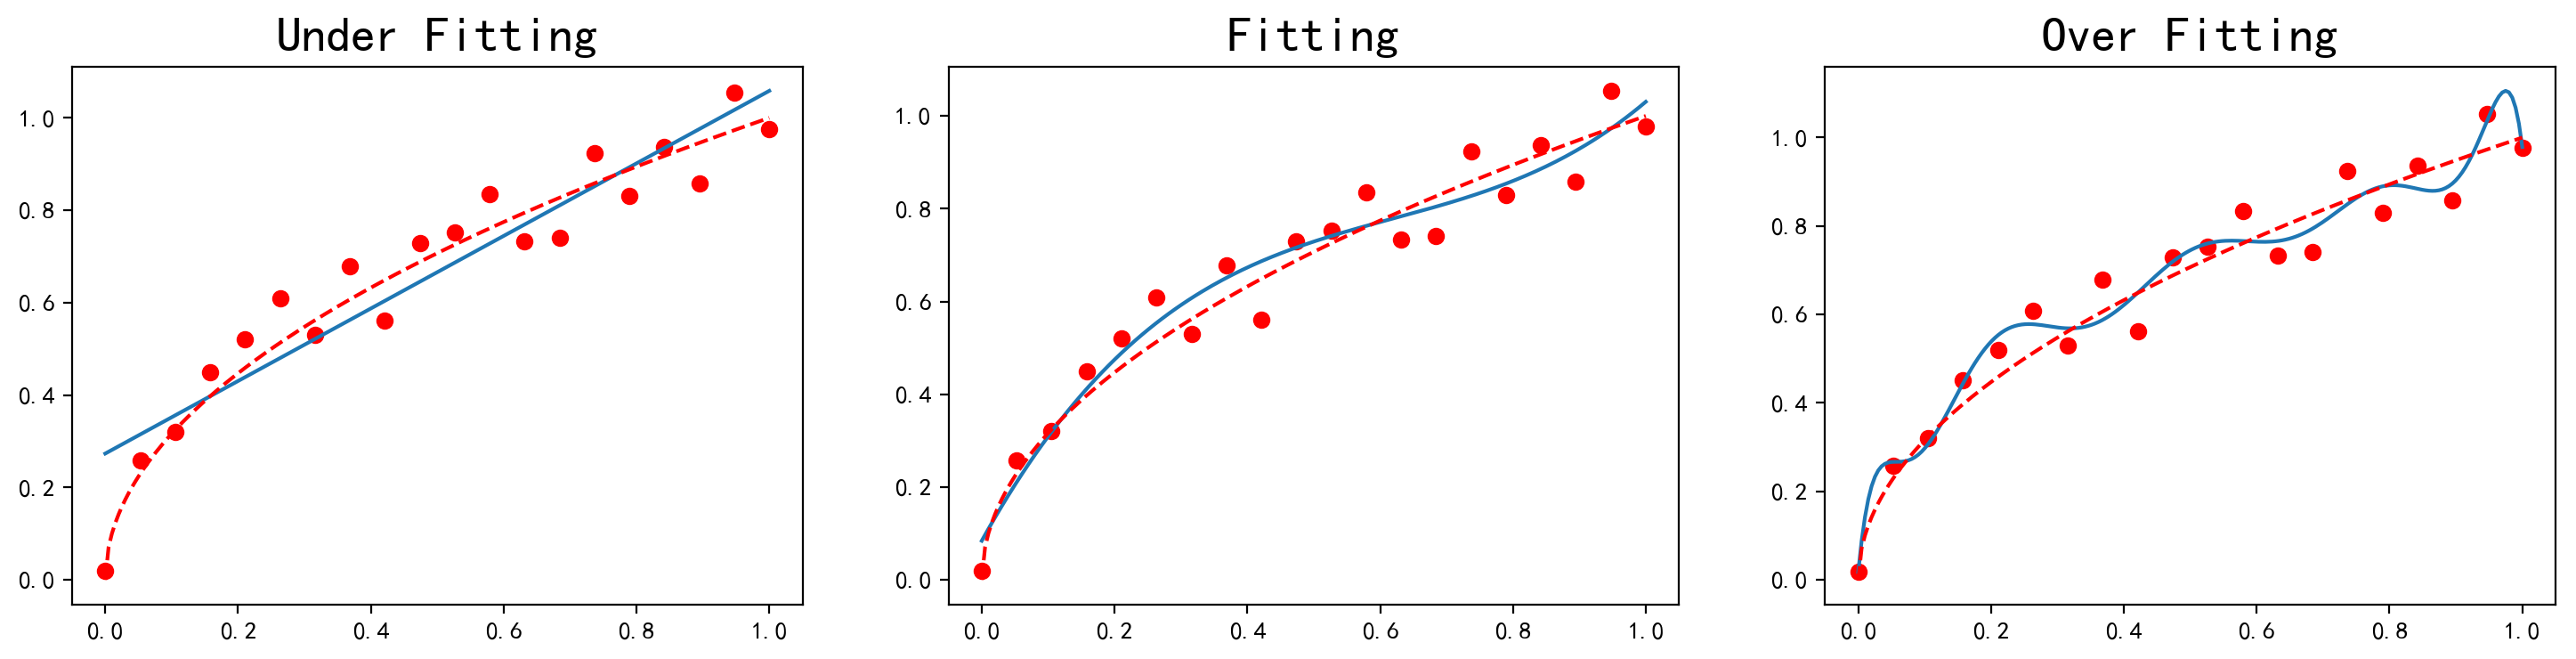

In [4]:
plt.figure(figsize=(18, 4), dpi=100)
titles = ['Under Fitting', 'Fitting', 'Over Fitting']
models = [None, None, None]
for index, order in enumerate([1, 3, 10]):
    plt.subplot(1, 3, index + 1)
    models[index] = plot_polynomial_fit(x, y, order)
    plt.title(titles[index], fontsize=20)
plt.show()

In [5]:
for m in models:
    print('model coeffs: {0}'.format(m.coeffs))

model coeffs: [0.78510195 0.27335829]
model coeffs: [ 1.90243512 -3.54098957  2.58491544  0.08420189]
model coeffs: [-2.47827704e+04  1.24204138e+05 -2.65359117e+05  3.15077516e+05
 -2.27168525e+05  1.01999566e+05 -2.81189271e+04  4.51508177e+03
 -3.81719610e+02  1.57169910e+01  1.77055373e-02]


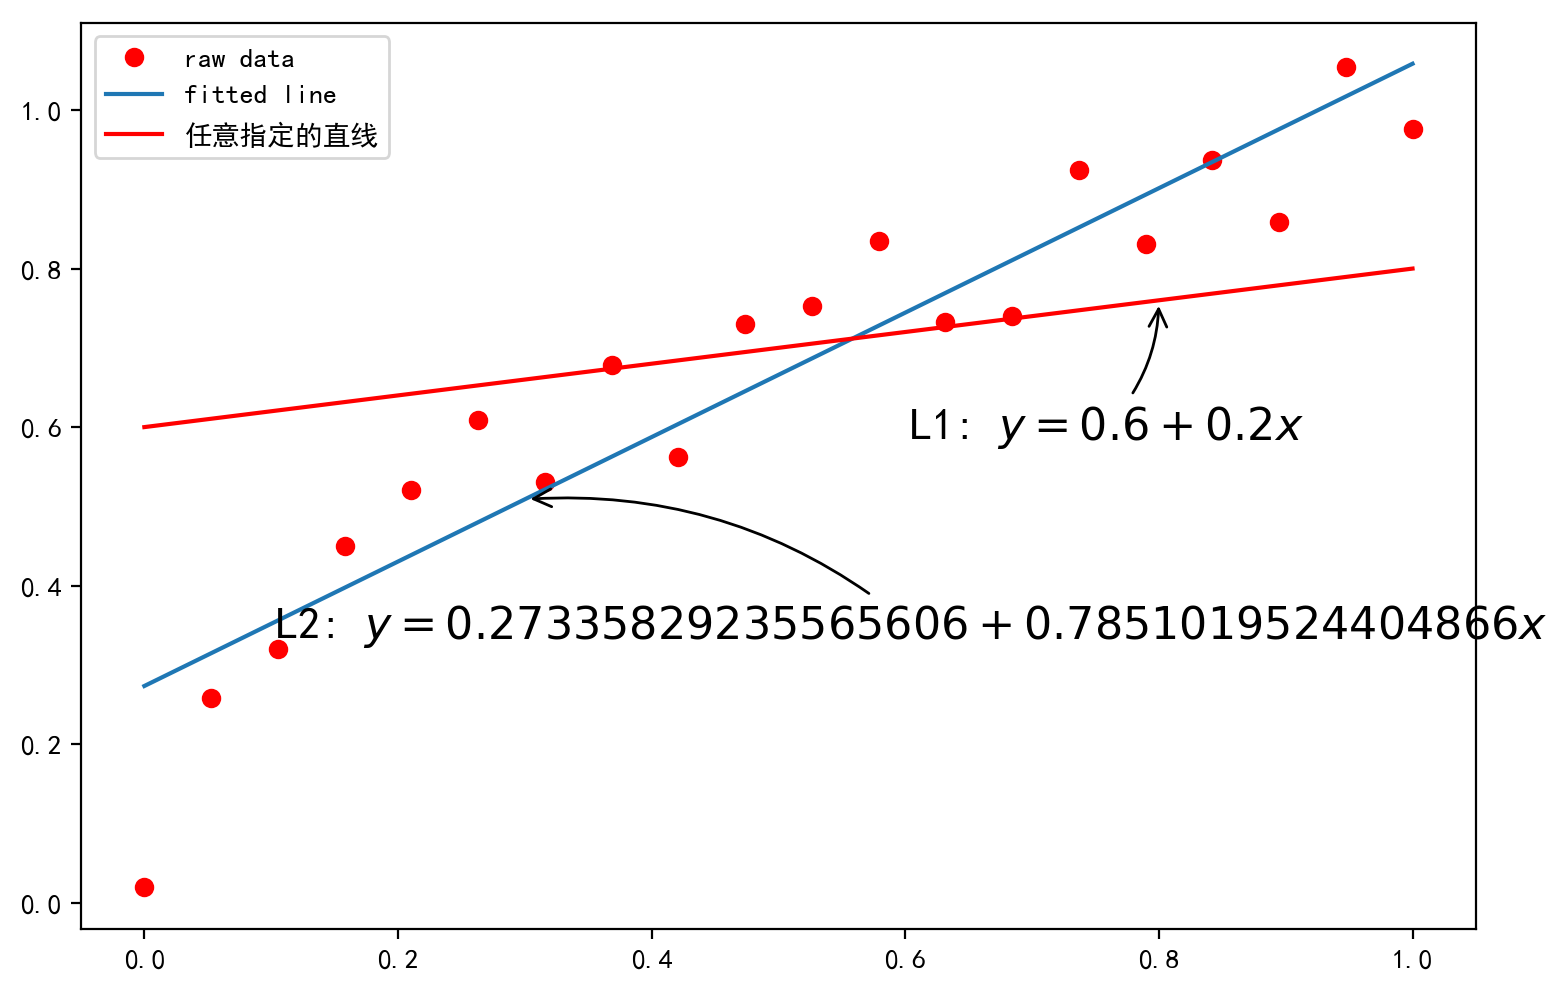

In [7]:
# 针对一阶多项式的模型，不同的参数拟合出来的直线和训练样本对应的位置关系
coeffs_1d = [0.2, 0.6]

plt.figure(figsize=(9, 6), dpi=100)
t = np.linspace(0, 1, 200)

# 原始点
plt.plot(x, y, 'ro', label='raw data')

# 训练好的模型
plt.plot(t, models[0](t), '-', label='fitted line')
plt.plot(t, np.poly1d(coeffs_1d)(t), 'r-', label='任意指定的直线')

plt.annotate(
    r'L1: $y = {1} + {0}x$'.format(coeffs_1d[0], coeffs_1d[1]),
    xy=(0.8, np.poly1d(coeffs_1d)(0.8)),
    xycoords='data',
    xytext=(-90, -50),
    textcoords='offset points',
    fontsize=16,
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.annotate(
    r'L2: $y = {1} + {0}x$'.format(models[0].coeffs[0], models[0].coeffs[1]),
    xy=(0.3, models[0](0.3)),
    xycoords='data',
    xytext=(-90, -50),
    textcoords='offset points',
    fontsize=16,
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
plt.legend()
plt.show()